## Task 2 Exploratory Data Analysis & Data Cleaning

This notebook is for Historical pricing data: variable and fixed pricing data etc

## Data Dictionary

<img src="detail.jpg">

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import datetime, timedelta
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("histdata.csv",parse_dates=['price_date'], dayfirst=True)

In [3]:
df

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            193002 non-null  object        
 1   price_date    193002 non-null  datetime64[ns]
 2   price_p1_var  191643 non-null  float64       
 3   price_p2_var  191643 non-null  float64       
 4   price_p3_var  191643 non-null  float64       
 5   price_p1_fix  191643 non-null  float64       
 6   price_p2_fix  191643 non-null  float64       
 7   price_p3_fix  191643 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [5]:
df.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [6]:
df.columns

Index(['id', 'price_date', 'price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix'], dtype='object')

In [7]:
df["id"].value_counts()

646c5ad310607b18892f18f69196c487    12
fdec487854fbc3fb98323522873707ee    12
18460927730d1468ad9e490cef8d94a9    12
3b2e69d8a6a395cdd438326f4ef89303    12
aa8549e784e32f31a5eaea2bb952e007    12
                                    ..
3e459d61dc831e29f8a9a9a59f95efd2     8
223a98d3832ece78cbf279a194868b54     8
bf89f2d8c1b133a134fd93603cb4c947     7
15b36e47cf04bf151e3f4438d12672e5     7
c5dcd5c506e565aaabffa29bc1ec0a37     7
Name: id, Length: 16096, dtype: int64

In [8]:
df["price_date"].value_counts()

2015-12-01    16094
2015-08-01    16094
2015-07-01    16090
2015-11-01    16087
2015-10-01    16085
2015-06-01    16085
2015-09-01    16082
2015-02-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [9]:
df.groupby(["price_date"]).mean()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
price_date,,,,,,
2015-01-01,0.142561,0.054884,0.030399,43.224372,10.716260,6.469952
2015-02-01,0.142757,0.054958,0.030462,43.226638,10.706995,6.469121
2015-03-01,0.143091,0.054987,0.030527,43.241339,10.690361,6.457830
2015-04-01,0.143213,0.055551,0.030993,43.269548,10.822268,6.528723
2015-05-01,0.143512,0.055089,0.030665,43.304062,10.697581,6.448145
2015-06-01,0.143692,0.054739,0.030413,43.328810,10.593585,6.388537
2015-07-01,0.143669,0.055200,0.030809,43.337050,10.702093,6.457581
2015-08-01,0.137905,0.053495,0.030822,43.362274,10.698239,6.453573
2015-09-01,0.137888,0.053355,0.030776,43.346782,10.661984,6.427358


In [10]:
df.groupby(["price_date"]).median()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
price_date,,,,,,
2015-01-01,0.148825,0.084991,0.0,44.266931,0.0,0.0
2015-02-01,0.148825,0.085058,0.0,44.266931,0.0,0.0
2015-03-01,0.148825,0.085058,0.0,44.266931,0.0,0.0
2015-04-01,0.148825,0.085658,0.0,44.266930,0.0,0.0
2015-05-01,0.148825,0.085658,0.0,44.266930,0.0,0.0
2015-06-01,0.148825,0.085390,0.0,44.266930,0.0,0.0
2015-07-01,0.148825,0.085658,0.0,44.266930,0.0,0.0
2015-08-01,0.144524,0.084905,0.0,44.266930,0.0,0.0
2015-09-01,0.144524,0.085165,0.0,44.266930,0.0,0.0


In [11]:
df.groupby(["id"]).mean()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


In [12]:
company = pd.DataFrame(df.groupby(["id"]).mean())

In [13]:
company

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


In [14]:
output = pd.read_csv("output.csv", index_col="id")

In [15]:
output

,churn
id,
48ada52261e7cf58715202705a0451c9,0
24011ae4ebbe3035111d65fa7c15bc57,1
d29c2c54acc38ff3c0614d0a653813dd,0
764c75f661154dac3a6c254cd082ea7d,0
bba03439a292a1e166f80264c16191cb,0
...,...
18463073fb097fc0ac5d3e040f356987,0
d0a6f71671571ed83b2645d23af6de00,1
10e6828ddd62cbcf687cb74928c4c2d2,1


In [16]:
df3 = pd.merge(left=company, right=output, how="inner", left_index=True, right_index=True)

In [17]:
df3

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
id,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0
...,...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,0
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,0
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,0


In [18]:
df3["churn"].value_counts()

0    14501
1     1595
Name: churn, dtype: int64

In [19]:
print("Percentage of churn customers: {:.2f}%".format(1595/14501*100))

Percentage of churn customers: 11.00%


In [34]:
df3.reset_index(inplace=True)

In [35]:
df3

,id,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,0
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972,0
16092,fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000,0
16093,fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569,0
16094,fffe4f5646aa39c7f97f95ae2679ce64,0.123858,0.103499,0.073735,40.606699,24.364017,16.242678,0


In [36]:
#df3.to_csv("customerchurn.csv",index=False)

## Data Visualization

### Univariate Data Exploration

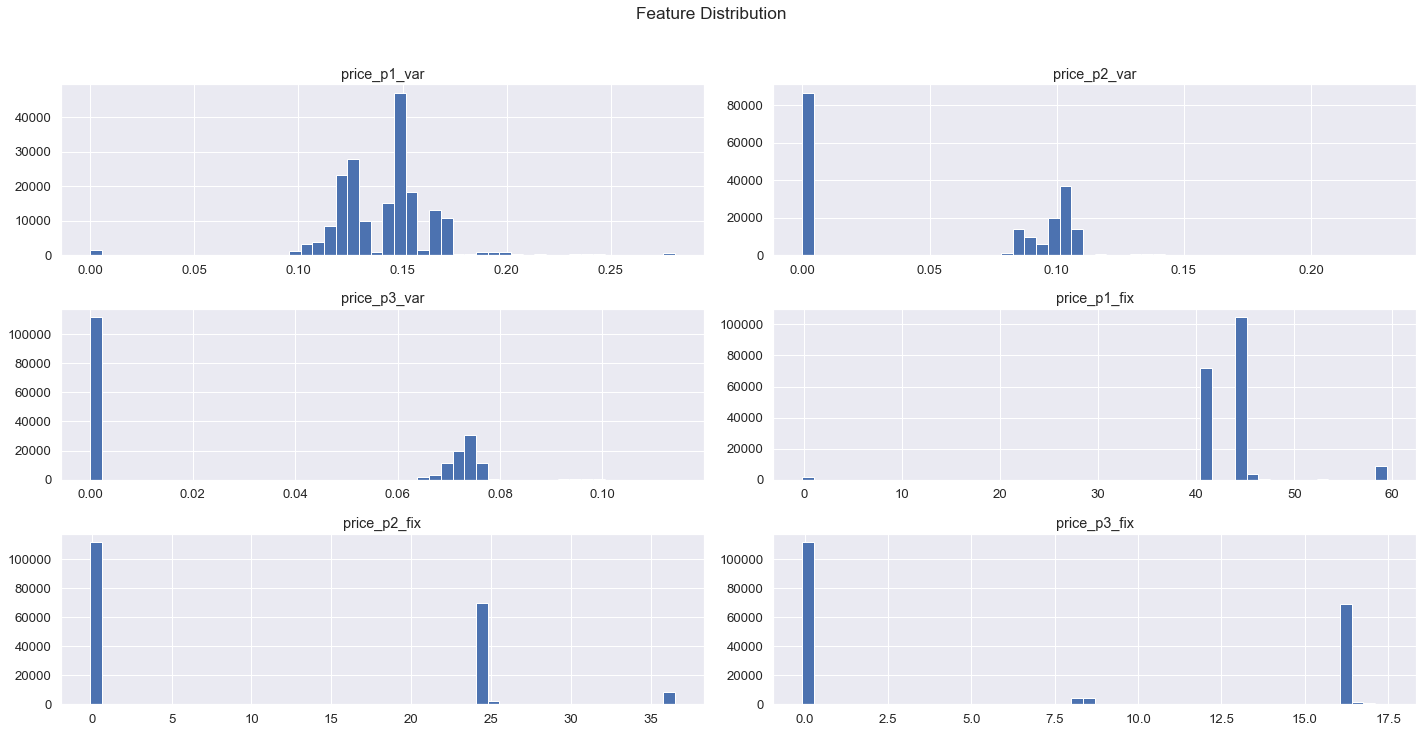

In [21]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

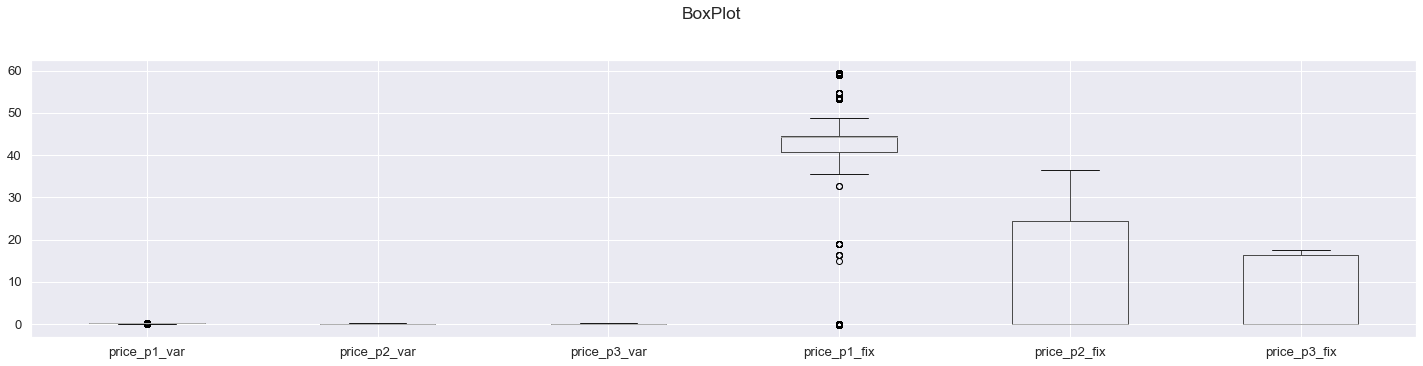

In [22]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

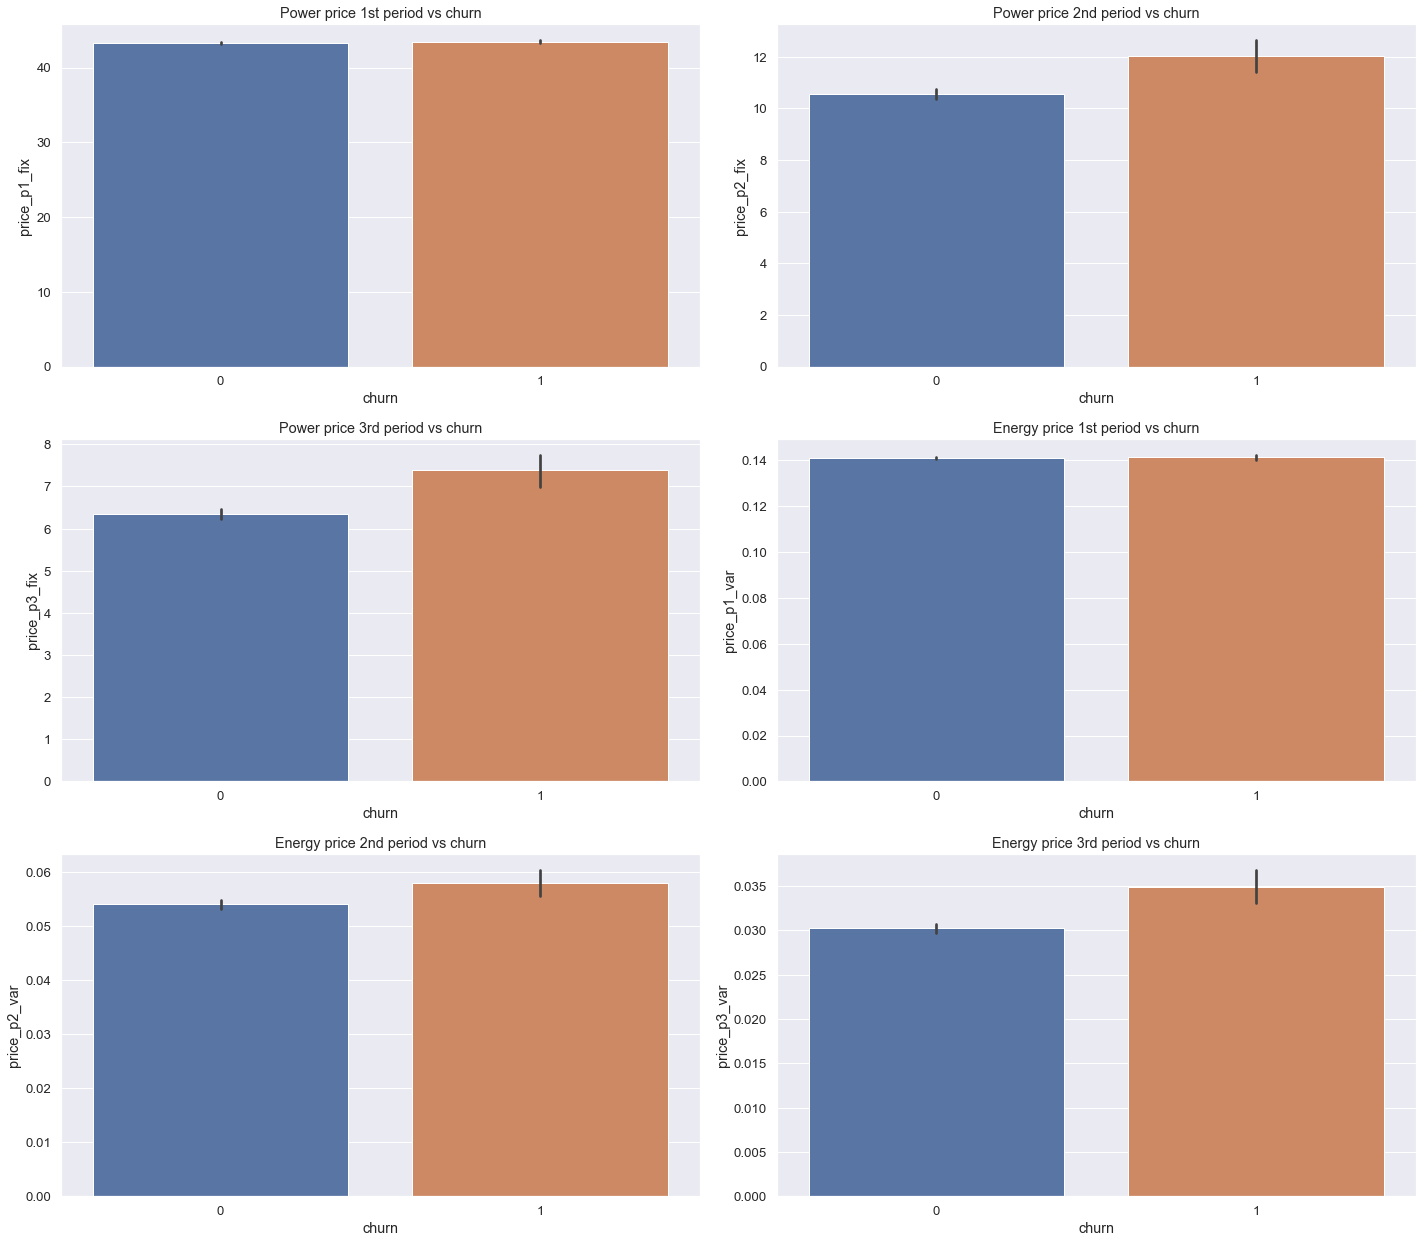

In [23]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("Power price 1st period vs churn")
sns.barplot(x=df3.churn, y=df3.price_p1_fix, data=df3)

plt.subplot(7,2,2)
plt.title("Power price 2nd period vs churn")
sns.barplot(x=df3.churn, y=df3.price_p2_fix, data=df3)

plt.subplot(7,2,3)
plt.title("Power price 3rd period vs churn")
sns.barplot(x=df3.churn, y=df3.price_p3_fix, data=df3)

plt.subplot(7,2,4)
plt.title("Energy price 1st period vs churn")
sns.barplot(x=df3.churn, y=df3.price_p1_var, data=df3)

plt.subplot(7,2,5)
plt.title("Energy price 2nd period vs churn")
sns.barplot(x=df3.churn, y=df3.price_p2_var, data=df3)

plt.subplot(7,2,6)
plt.title("Energy price 3rd period vs churn")
sns.barplot(x=df3.churn, y=df3.price_p3_var, data=df3)


plt.tight_layout()
plt.show()

#### Note: Churn happens in second and third period

### Time-Series Analysis

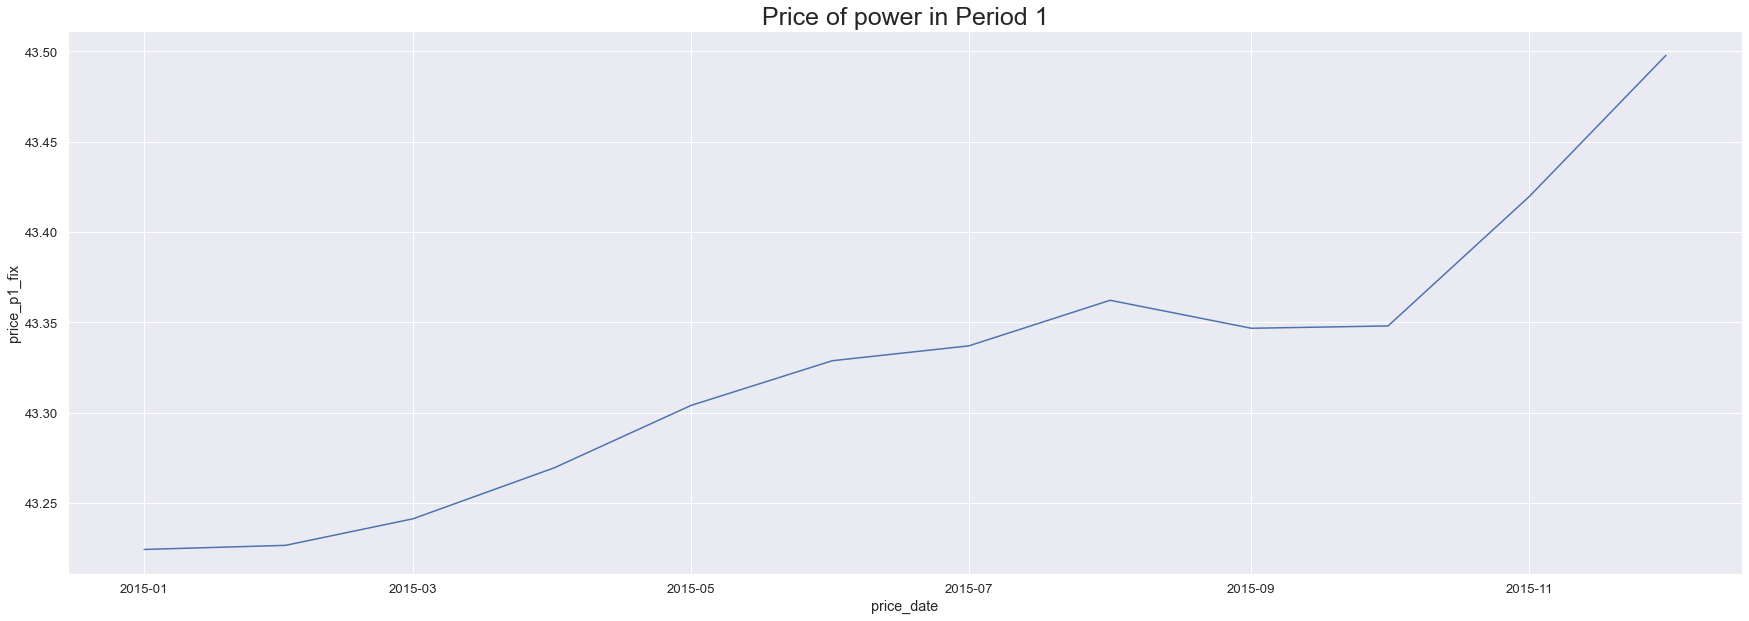

In [24]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.price_date,y=df.price_p1_fix,data=df, estimator="mean")
plt.title("Price of power in Period 1", fontsize = 25)
plt.show()

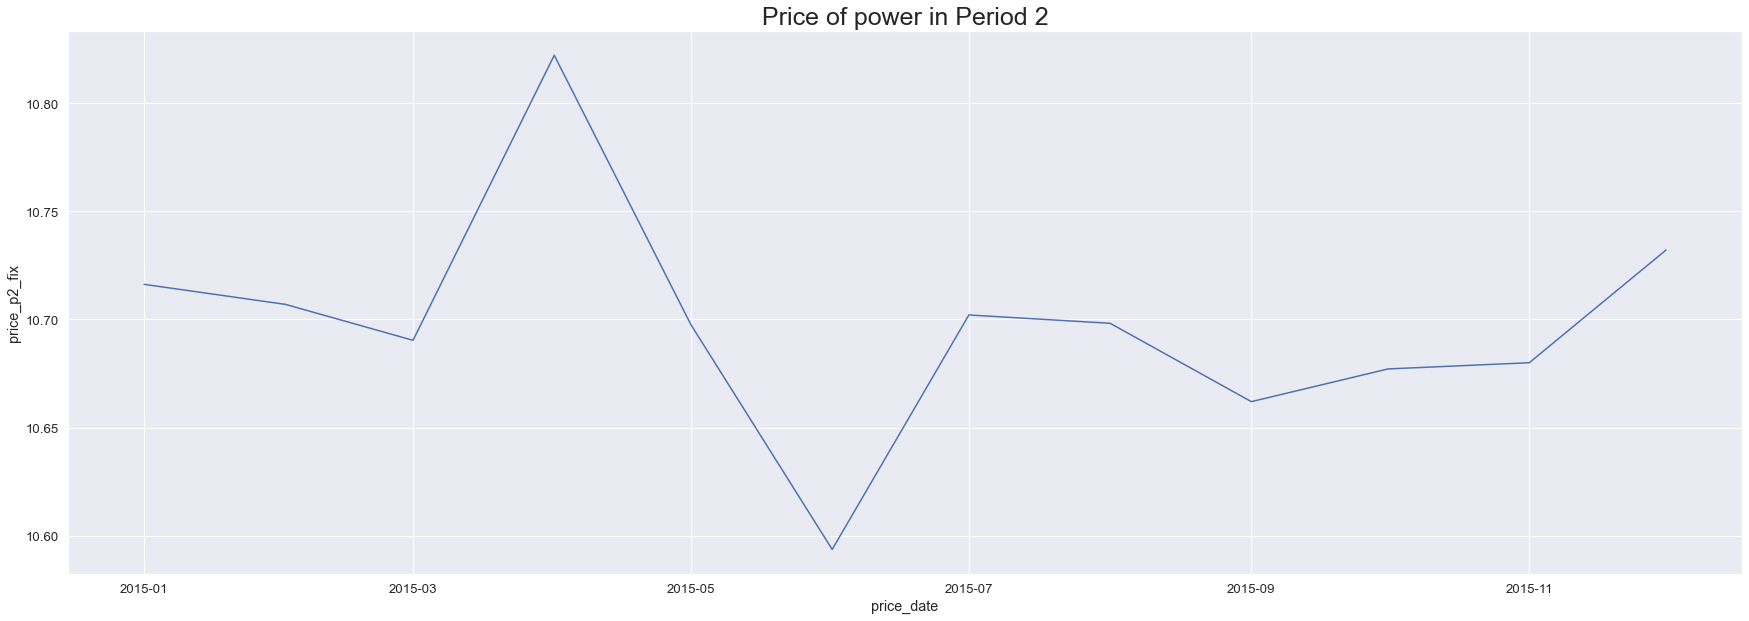

In [25]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.price_date,y=df.price_p2_fix,data=df, estimator="mean")
plt.title("Price of power in Period 2", fontsize = 25)
plt.show()

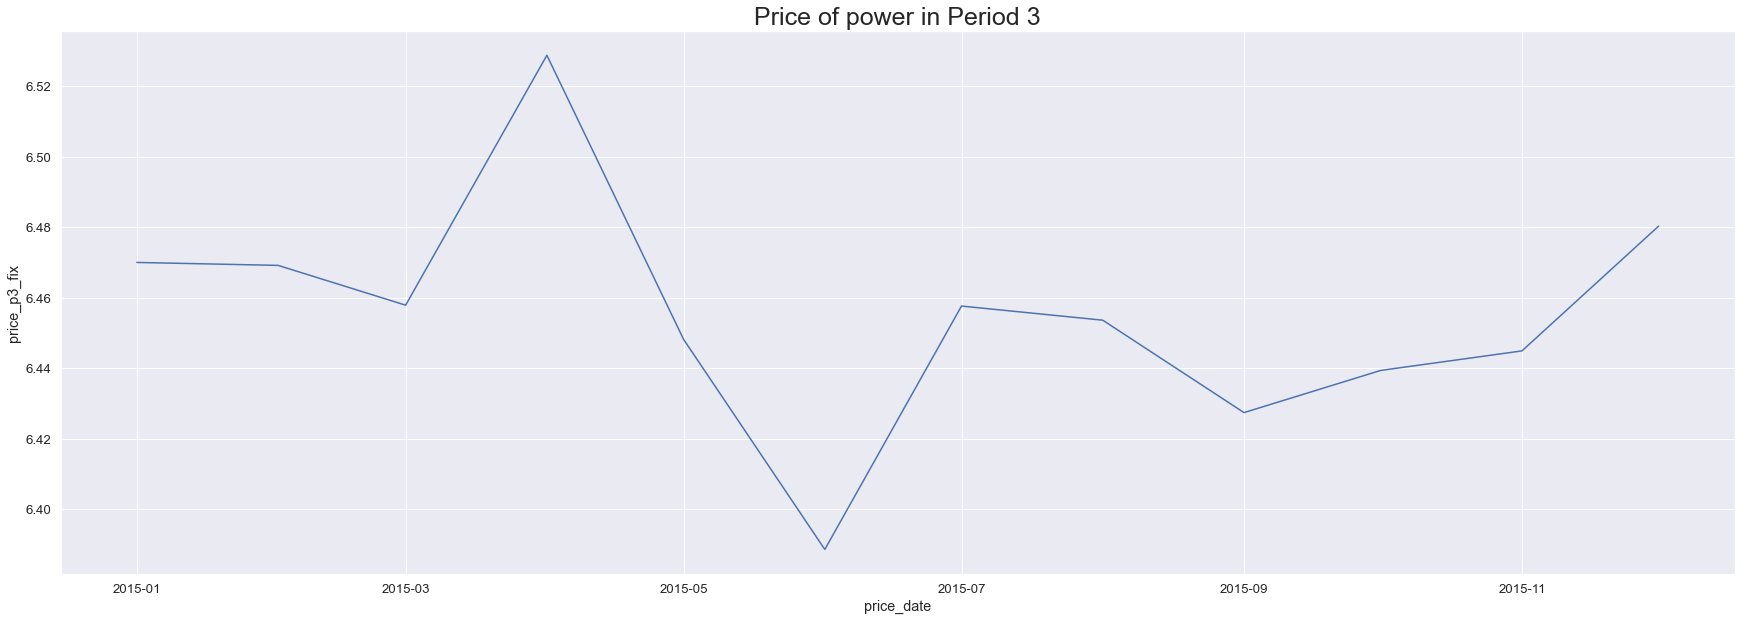

In [26]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.price_date,y=df.price_p3_fix,data=df, estimator="mean")
plt.title("Price of power in Period 3", fontsize = 25)
plt.show()

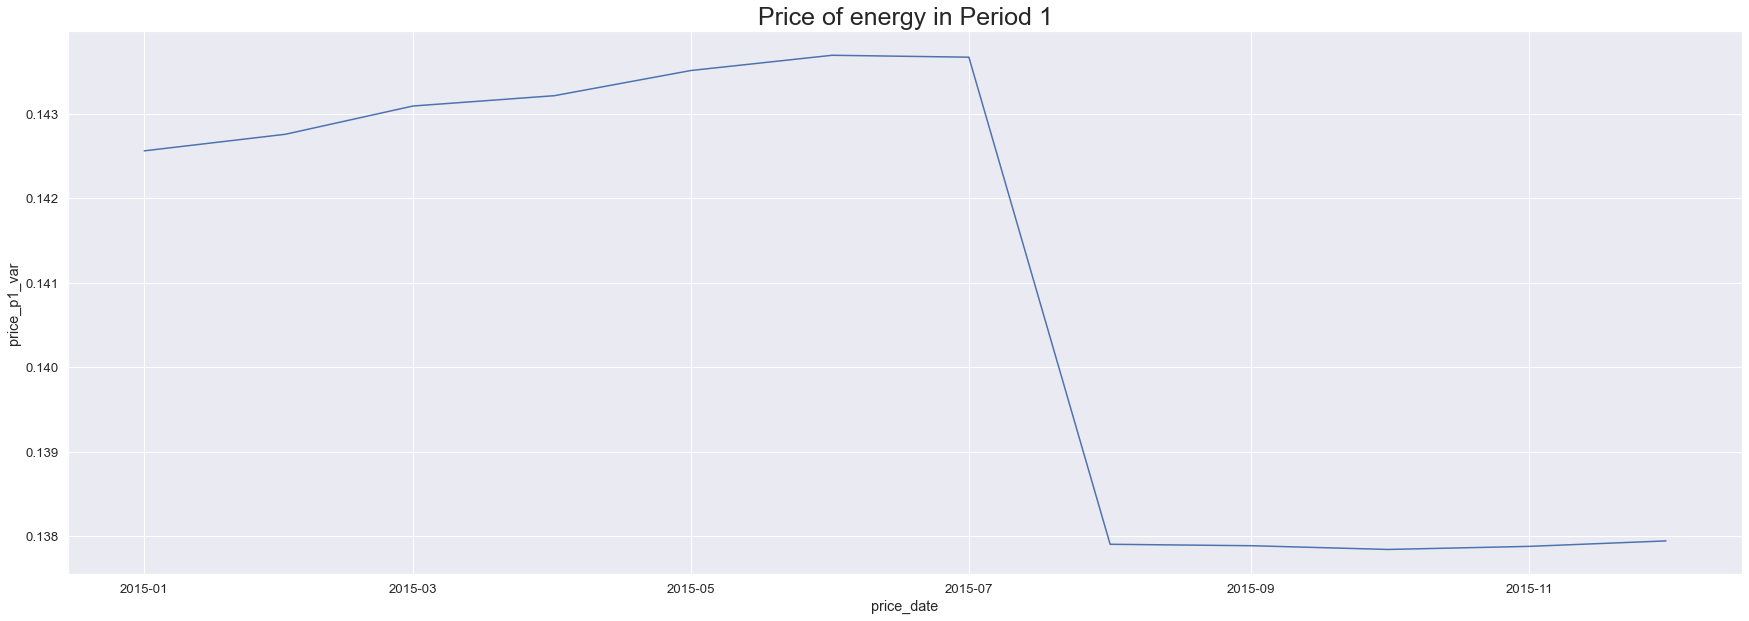

In [27]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.price_date,y=df.price_p1_var,data=df, estimator="mean")
plt.title("Price of energy in Period 1", fontsize = 25)
plt.show()

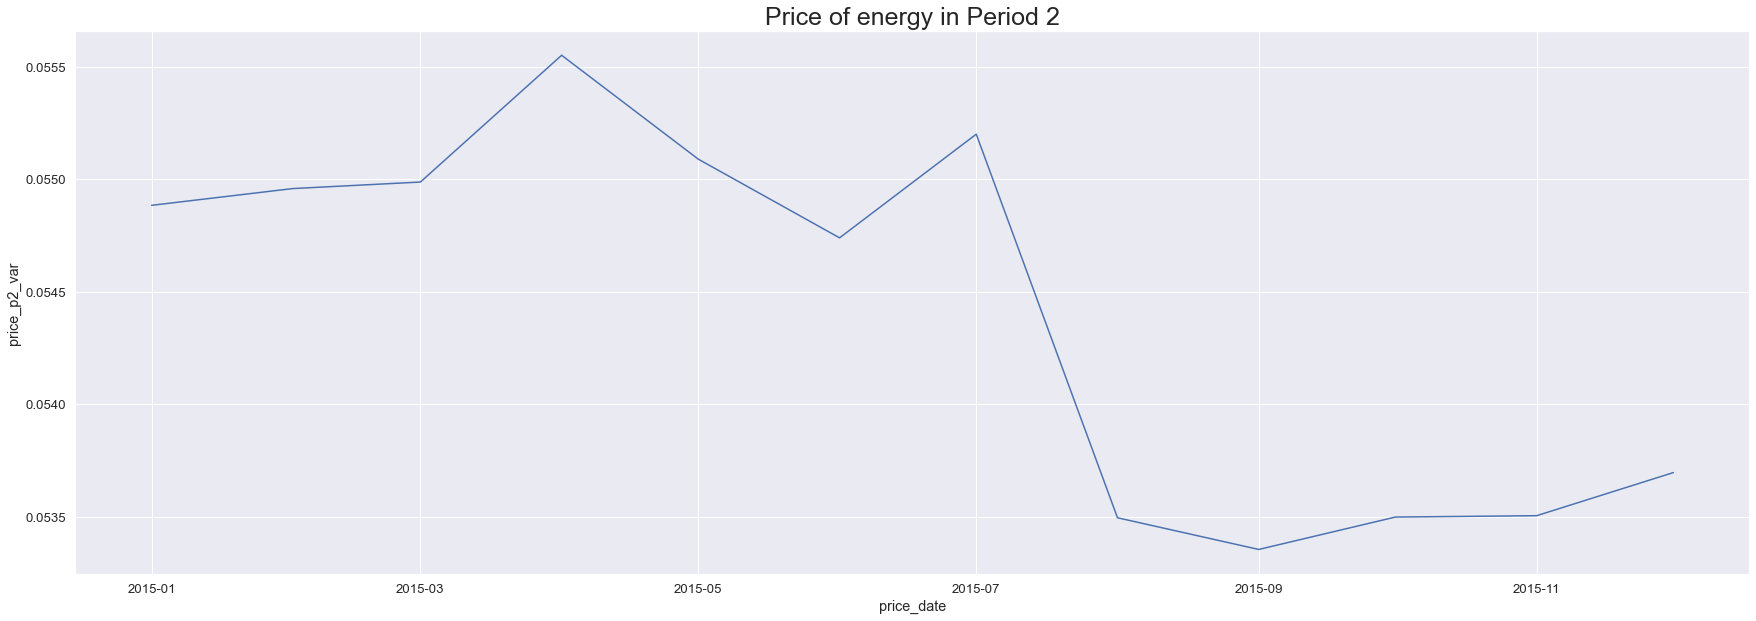

In [28]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.price_date,y=df.price_p2_var,data=df, estimator="mean")
plt.title("Price of energy in Period 2", fontsize = 25)
plt.show()

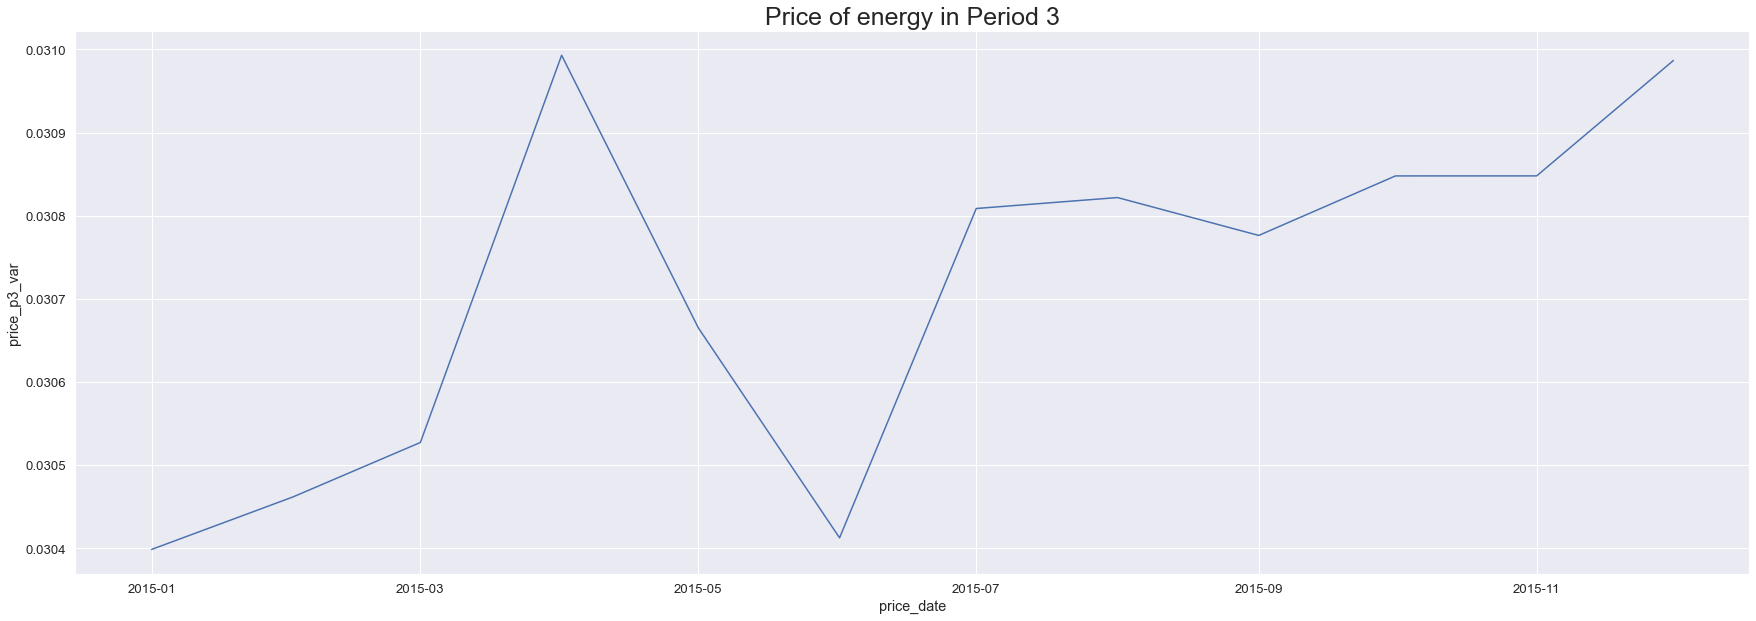

In [29]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.price_date,y=df.price_p3_var,data=df, estimator="mean")
plt.title("Price of energy in Period 3", fontsize = 25)
plt.show()

### Pairplots

<Figure size 1440x1440 with 0 Axes>

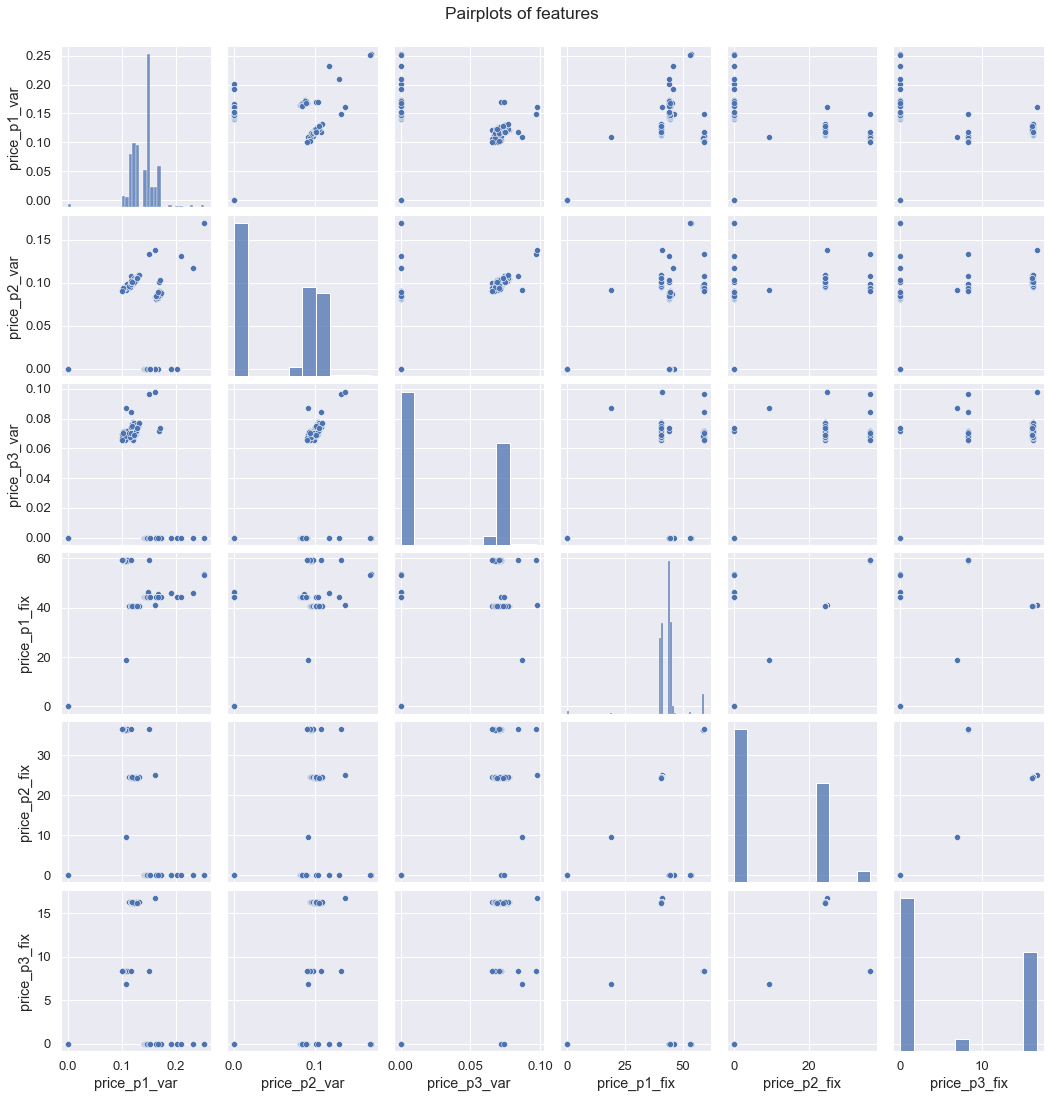

In [30]:
plt.figure(figsize=(20,20))
sns.pairplot(df.sample(500))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Correlation

In [31]:
df.corr()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
price_p1_var,1.000000,-0.329950,-0.595257,0.416443,-0.630465,-0.572522
price_p2_var,-0.329950,1.000000,0.828230,-0.099764,0.802757,0.814439
price_p3_var,-0.595257,0.828230,1.000000,-0.137346,0.973831,0.979617
price_p1_fix,0.416443,-0.099764,-0.137346,1.000000,0.000941,-0.251511
price_p2_fix,-0.630465,0.802757,0.973831,0.000941,1.000000,0.926955
price_p3_fix,-0.572522,0.814439,0.979617,-0.251511,0.926955,1.000000


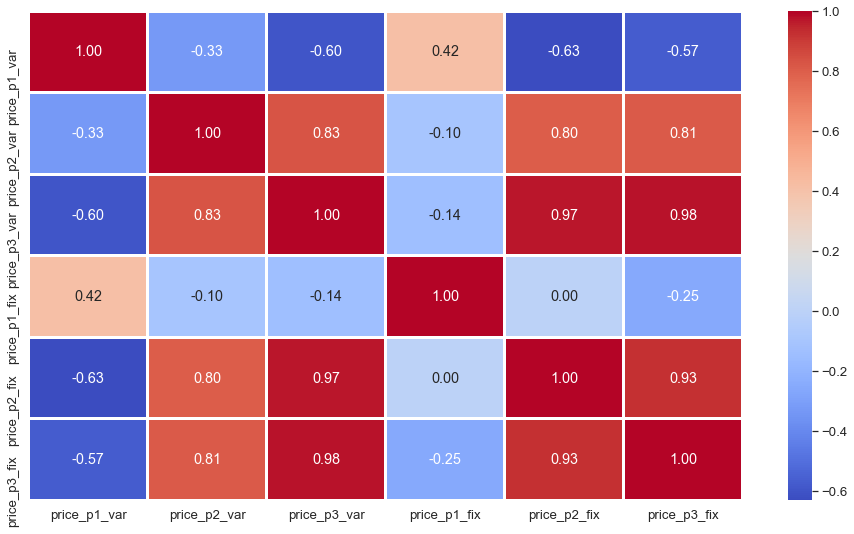

In [32]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

#### Note: price p2 and p3 are highly correlated to each other